In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.	Data Cleaning and Preparation:

In [3]:
df=pd.read_csv("Cardiotocographic.csv")

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## ●	Handle missing values appropriately (e.g., imputation, deletion).


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

In [8]:
df_hand=df.copy()
for i in numeric_cols:
    if df_hand[i].isnull().any():
        df_hand[i]=df_hand[i].fillna(df_hand[i].mean())

In [9]:
print(df_hand.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


## ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [10]:
df.columns = df.columns.str.strip()
for i in df.columns:
    if df[i].dtype == 'object':  
        df[i] = df[i].replace(',', '', regex=True)  
        df[i] = pd.to_numeric(df[i], errors='ignore')

## ●	Detect and treat outliers if necessary.

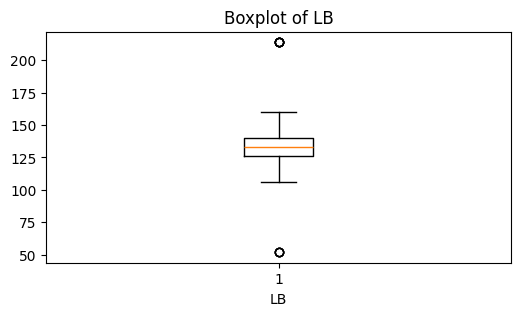

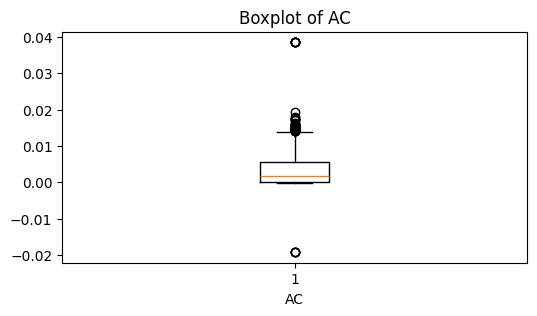

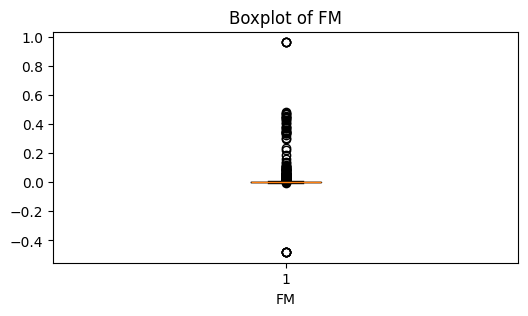

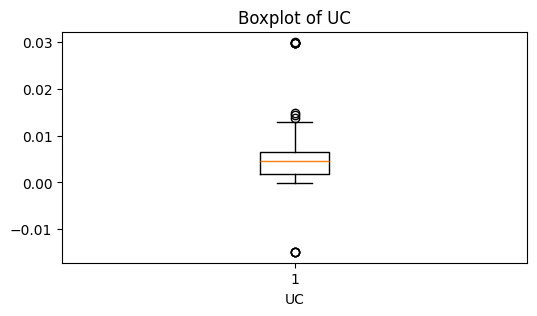

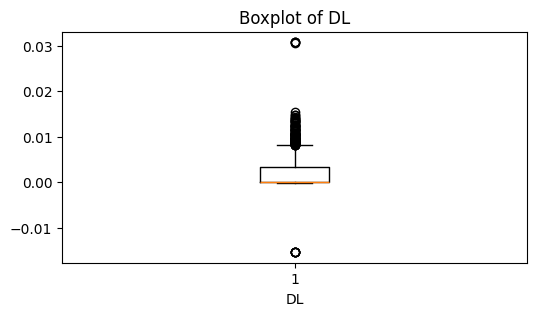

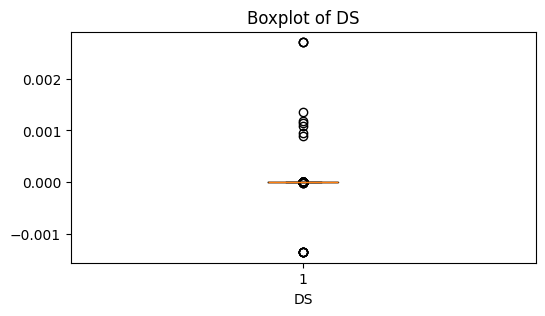

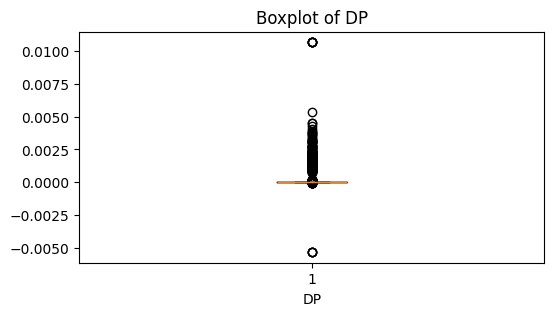

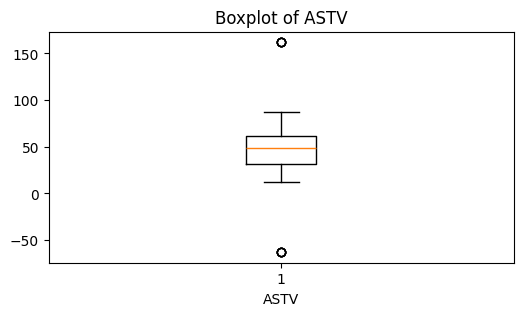

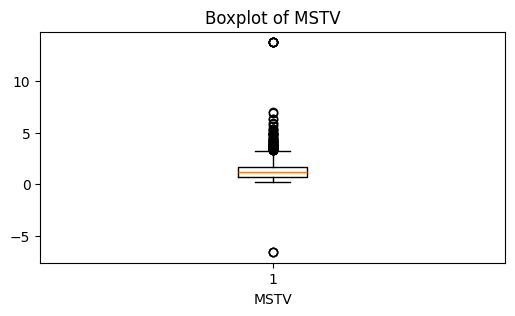

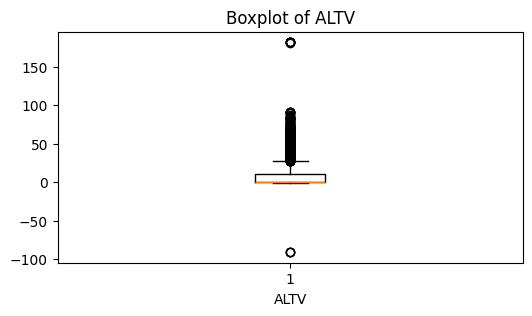

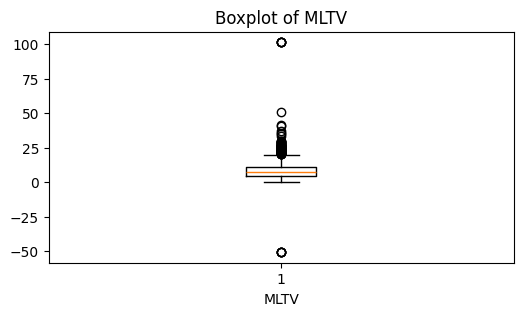

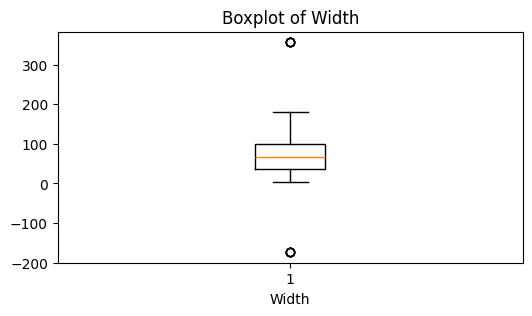

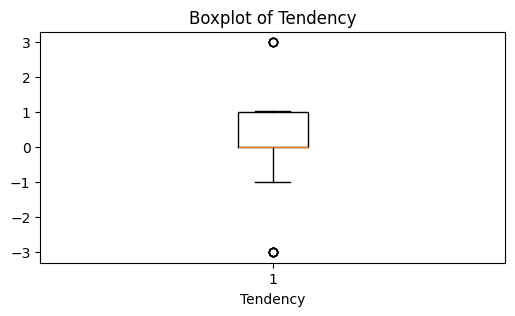

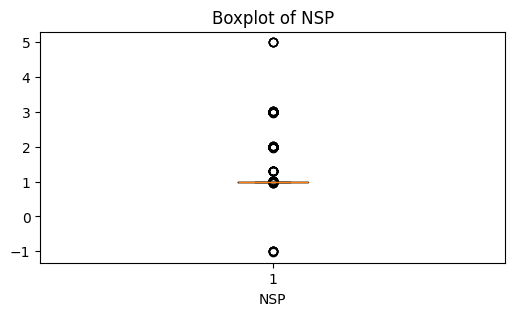

In [11]:
for i in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df_hand[i].dropna())
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [12]:
def outlier_capping(df_hand,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df_hand[column]=df_hand[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df_hand,col)

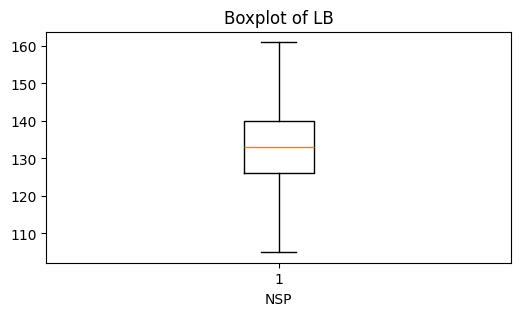

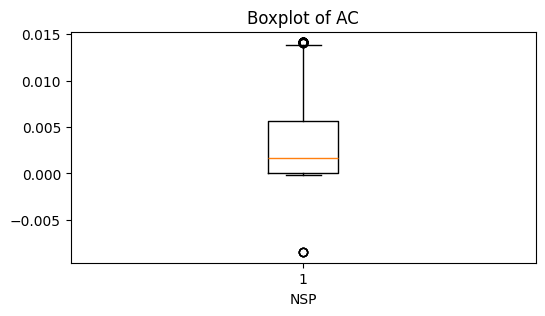

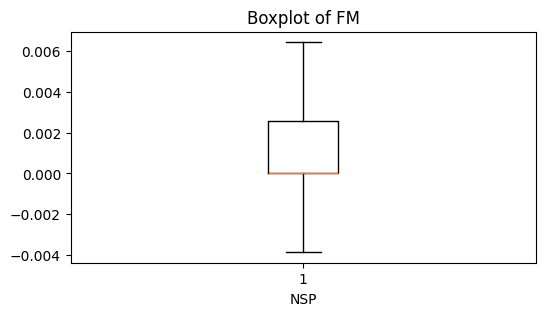

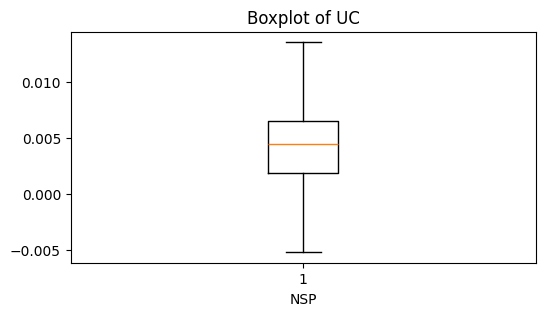

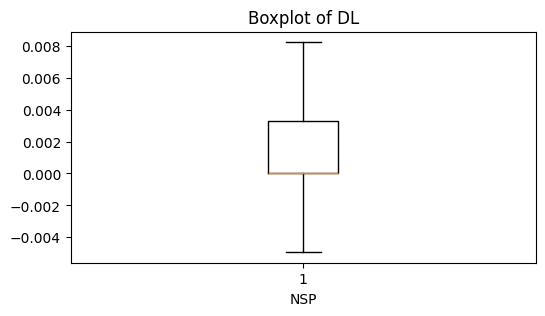

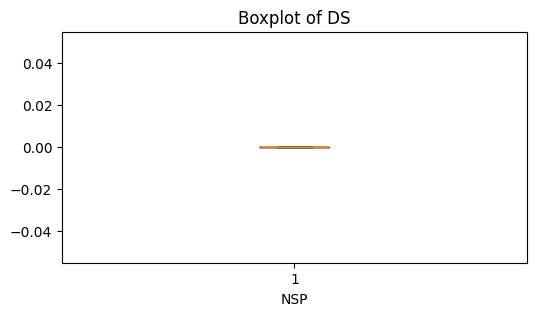

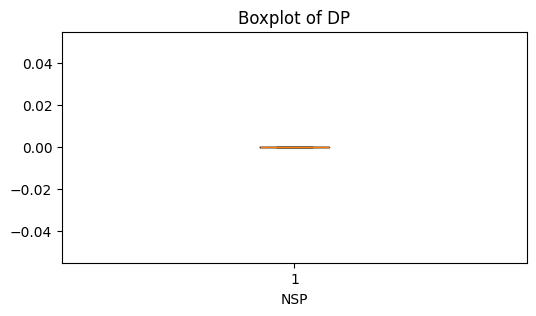

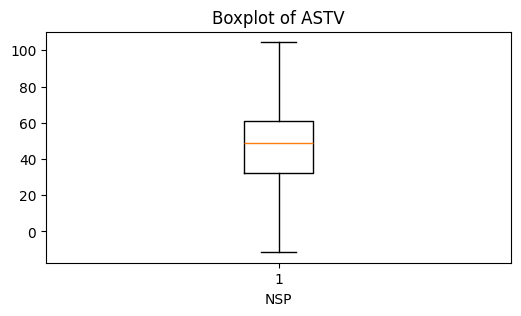

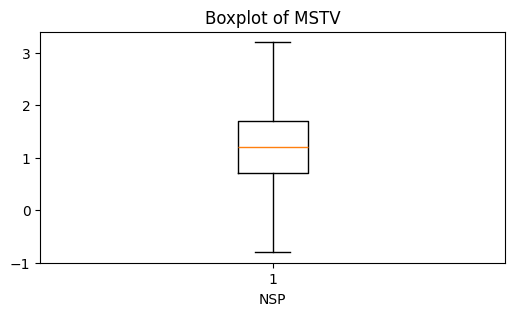

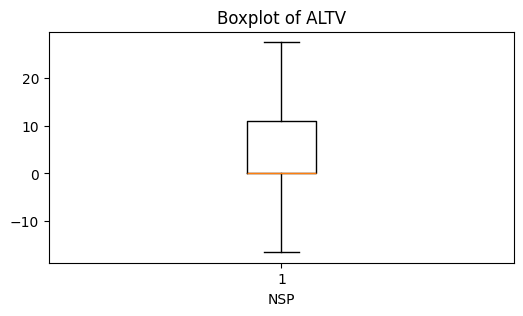

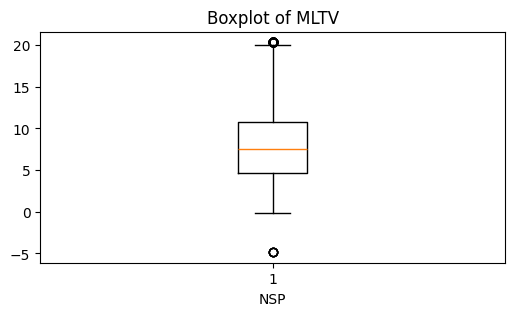

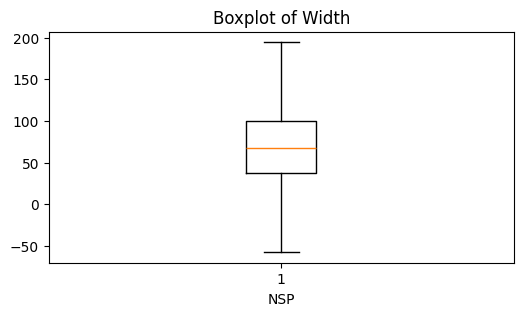

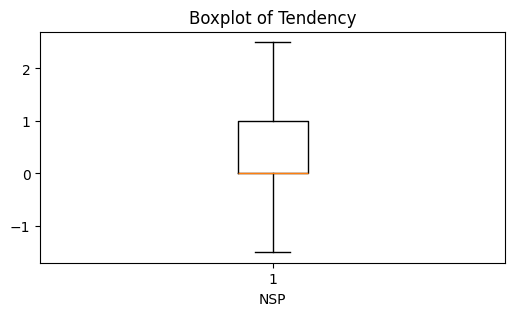

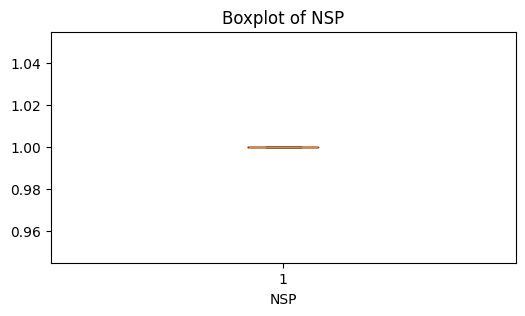

In [13]:
for i in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df_hand[i].dropna())
    plt.title(f'Boxplot of {i}')
    plt.xlabel(col)
    plt.show()

## 2.	Statistical Summary:
### ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).


In [14]:
stats = df_hand[numeric_cols].agg(['mean','median','std']).transpose()
stats['IQR'] = df_hand[numeric_cols].quantile(0.75) - df_hand[numeric_cols].quantile(0.25)
print(stats)

                mean      median        std        IQR
LB        133.293725  133.000000   9.930227  14.000000
AC          0.003149    0.001668   0.003831   0.005606
FM          0.001568    0.000000   0.002485   0.002567
UC          0.004362    0.004484   0.003001   0.004685
DL          0.001770    0.000000   0.002668   0.003289
DS          0.000000    0.000000   0.000000   0.000000
DP          0.000000    0.000000   0.000000   0.000000
ASTV       46.981873   49.000000  17.612745  29.000000
MSTV        1.304644    1.200000   0.781091   1.000000
ALTV        6.691678    0.000000  10.378400  11.000000
MLTV        8.024796    7.500000   5.069251   6.200000
Width      70.321076   68.000000  39.570633  63.000000
Tendency    0.319662    0.000000   0.621602   1.000000
NSP         1.000000    1.000000   0.000000   0.000000


## 3.	Data Visualization:
#### ●	Create histograms or boxplots to visualize the distributions of various numerical variables.


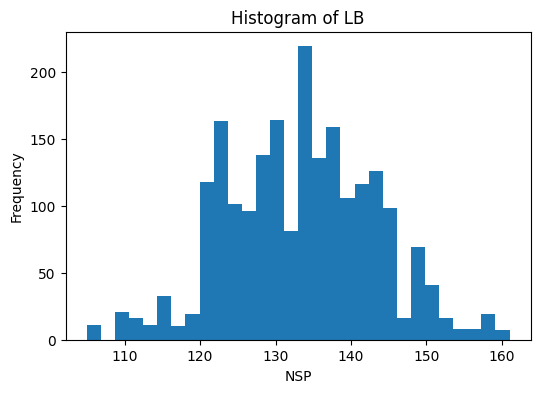

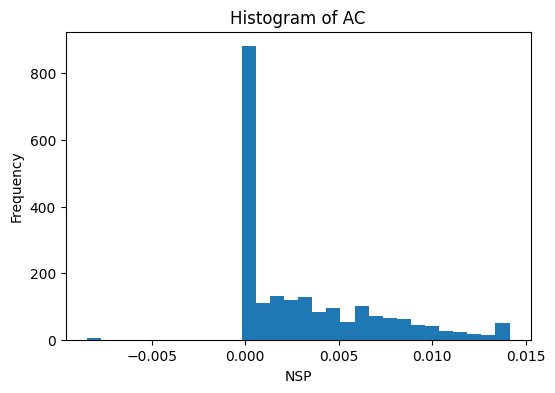

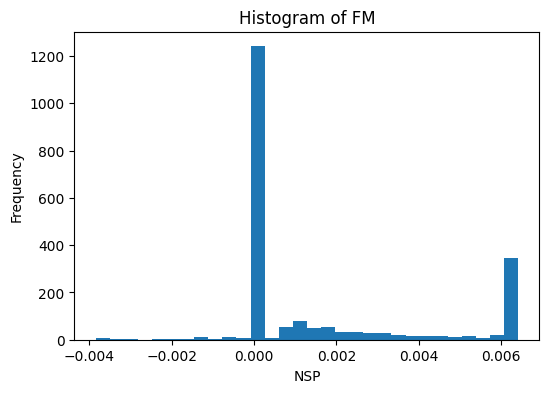

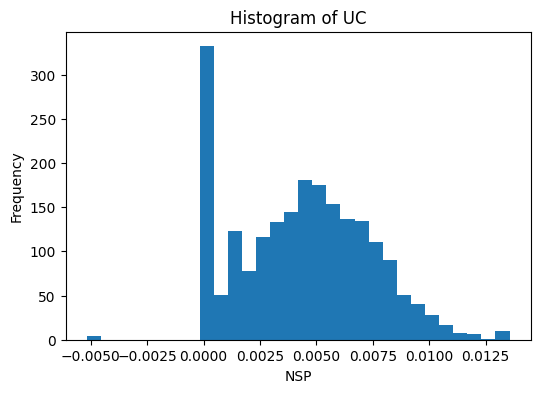

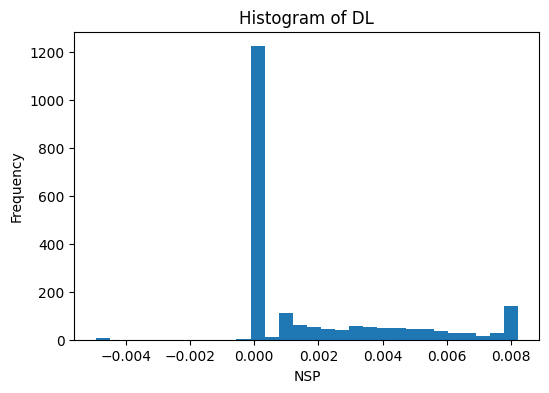

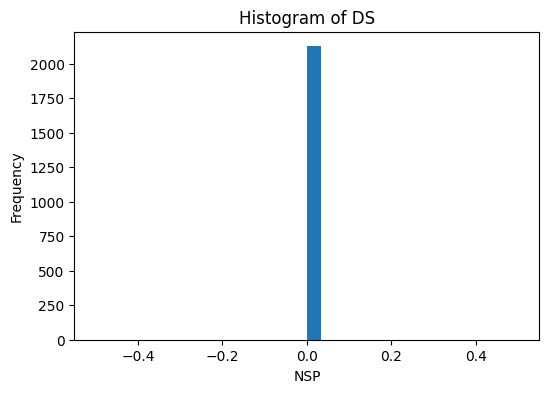

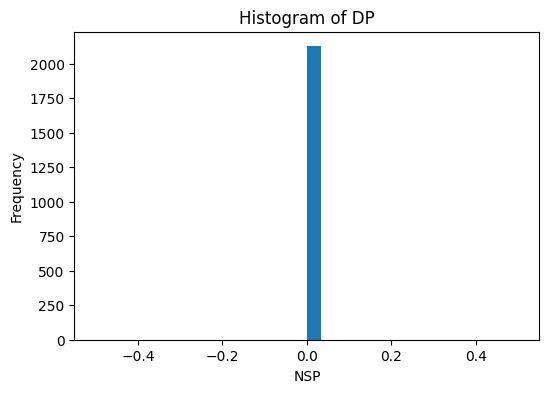

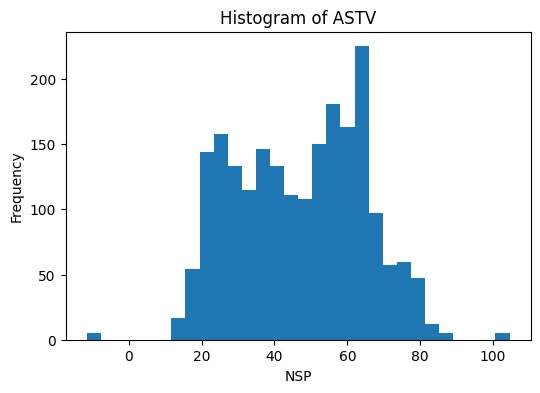

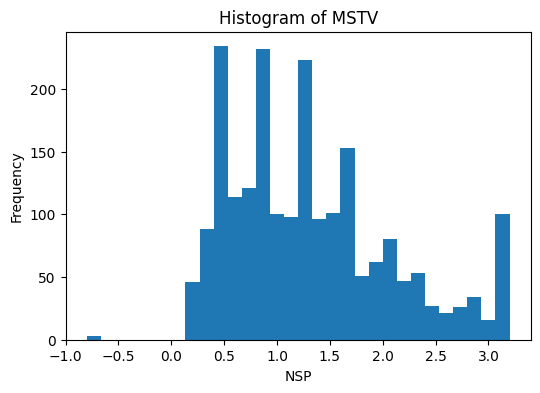

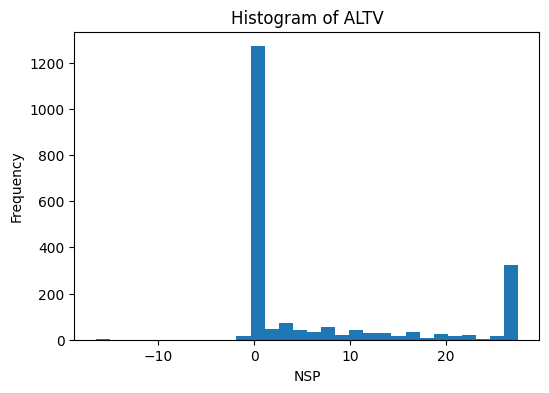

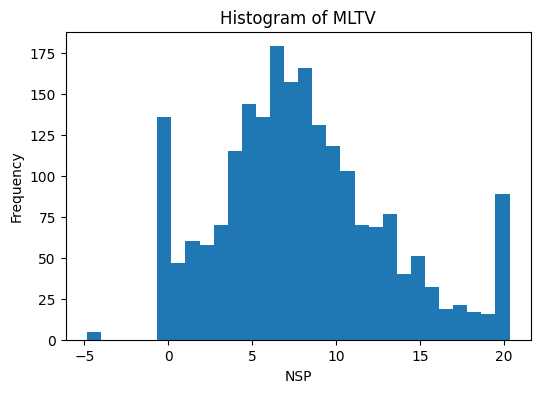

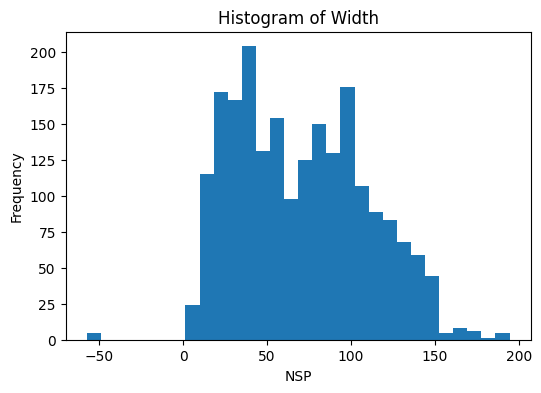

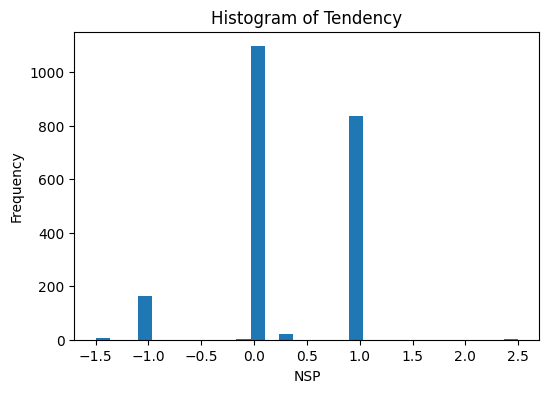

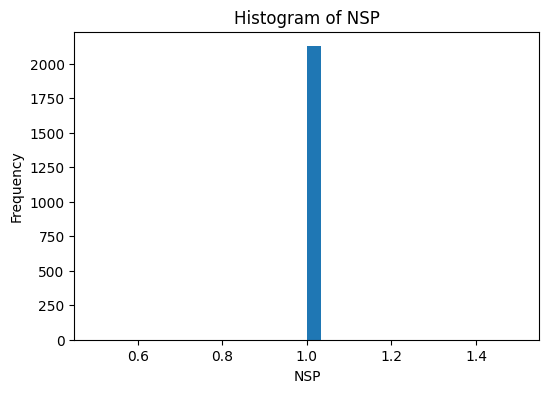

In [15]:
for i in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_hand[i].dropna(), bins=30)
    plt.title(f'Histogram of {i}')
    plt.xlabel(col); plt.ylabel('Frequency')
    plt.show()

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: []


#### no categorical variable present in the dataset

#### ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

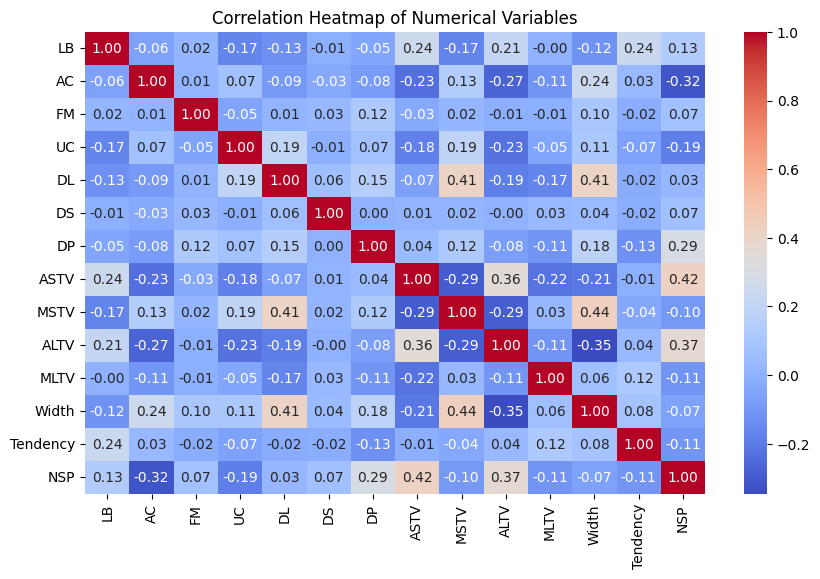

In [17]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

### ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights

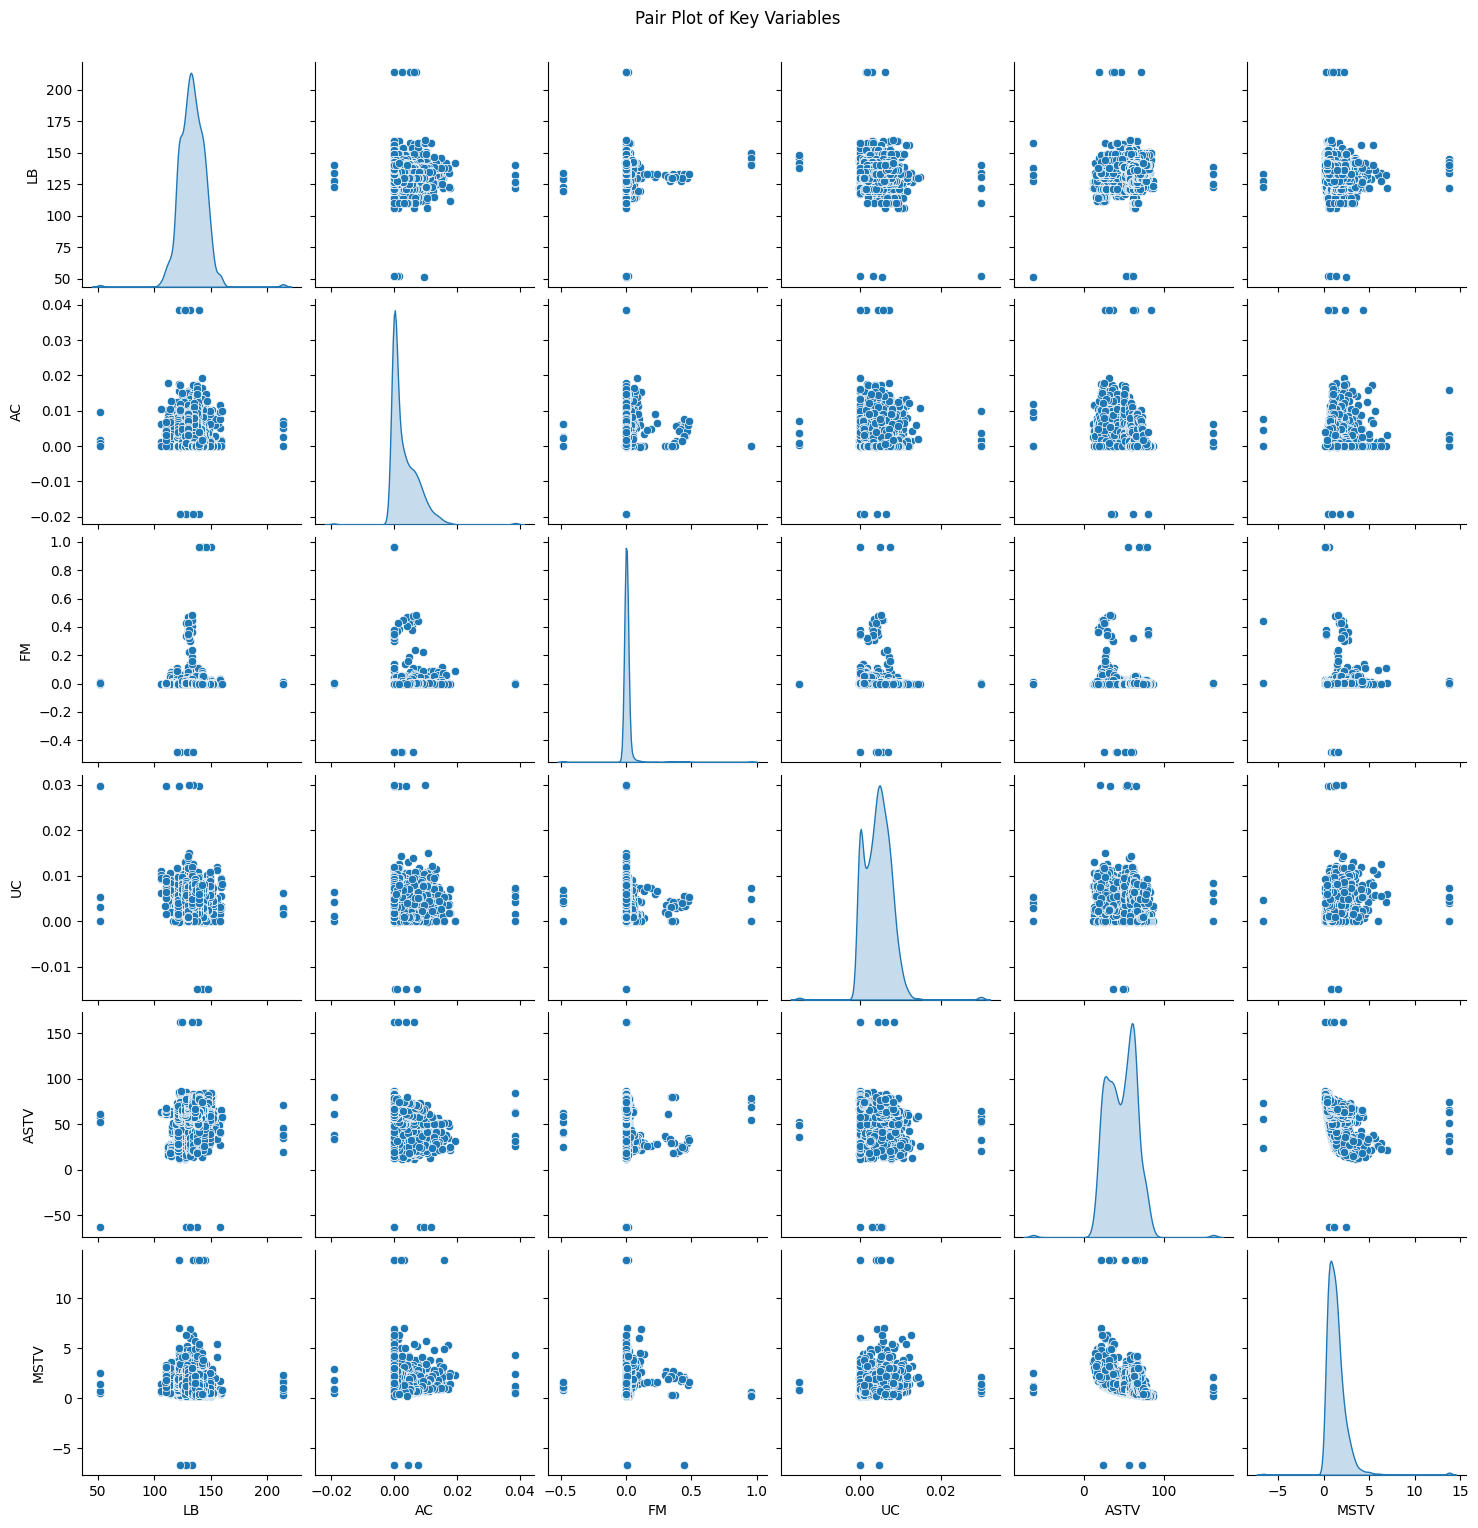

In [18]:
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

## Correlations Between Variables

After analyzing the correlation matrix and scatter plots:

LB (Baseline Fetal Heart Rate) shows a moderate positive correlation with AC (Accelerations) and ASTV (Abnormal Short-Term Variability).
→ This suggests that as the fetal heart rate increases, accelerations and variability in heart rate tend to increase — which may indicate normal fetal responsiveness.

UC (Uterine Contractions) has a weak or near-zero correlation with other variables, implying that contractions do not directly influence short-term heart rate changes in this dataset.

DL (Decelerations Late), DS (Decelerations Short), and DP (Decelerations Prolonged) show very low or zero variance, meaning they have little to no variation and may not contribute significantly to predicting fetal health conditions.

Strong correlations between ASTV, MSTV, ALTV, and MLTV indicate that short-term and long-term heart rate variabilities are closely related — these are key features for assessing fetal well-being.
 Implication:
Highly correlated variability measures (ASTV, MSTV, ALTV, MLTV) can serve as reliable indicators in medical diagnostics or predictive models for fetal distress detection.

2 Trends or Patterns Over Time

The dataset does not contain explicit time-series data (like timestamps or measurement dates), so direct temporal trend analysis is not possible.

However, if these features were recorded sequentially during monitoring, patterns such as increasing ASTV or UC values over time could indicate stress buildup or potential fetal distress.

In future studies, adding a time variable would allow trend analysis, such as observing changes in heart rate patterns before and after contractions.

## 5 Conclusion

After exploring the dataset, we can see that most features behave as expected, with a few showing interesting patterns. The fetal heart rate measures — like ASTV, MSTV, ALTV, and MLTV — are closely related, which makes sense since they all describe how the baby’s heart rate changes over time.

Some variables such as DL, DS, and DP don’t vary much, so they might not add much value to analysis or prediction. On the other hand, features like LB (baseline heart rate) and AC (accelerations) show positive relationships, which typically indicate healthy fetal activity.

Overall, this analysis helps us understand which factors matter most for assessing fetal health. These findings can guide doctors and data analysts to focus on the right signals, simplify models, and improve early detection of potential risks.